Ячейка 1, импортирование необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

Ячейка 2, чтение четырёх различных датасетов

In [2]:
data_1 = pd.read_excel('bsuirby_2023-12-05_-01h03m47s.xlsx')
data_2 = pd.read_excel('grsmuby_2023-12-05_-01h14m55s.xlsx')
data_3 = pd.read_excel('grsuby_2023-12-04_-20h07m05s.xlsx')
data_4 = pd.read_excel('wildberriesru_2023-12-09_-03h34m40s.xlsx')

Ячейка 3, предварительный анализ датасетов: вывод количества пустых и непустых строк, типов данных

In [3]:
datasets = [data_1, data_2, data_3, data_4]

for i, dataset in enumerate(datasets, start=1):
    total_rows = len(dataset)
    empty_rows = len(dataset[dataset.isna().all(axis=1)])
    value_rows = len(dataset.dropna())
    print(f'ДАТАСЕТ {i}')
    print(dataset.info())
    print(f'Количество пустых строк: {empty_rows}')
    print('-'*50)

ДАТАСЕТ 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  262 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB
None
Количество пустых строк: 13
--------------------------------------------------
ДАТАСЕТ 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  258 non-null    object
dtypes: object(1)
memory usage: 2.2+ KB
None
Количество пустых строк: 13
--------------------------------------------------
ДАТАСЕТ 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  261 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB
None
Колич

Ячейка 4, очистка датасетов от пустых строк 

In [4]:
data_1a = data_1.dropna()
data_2a = data_2.dropna()
data_3a = data_3.dropna()
data_4a = data_4.dropna()

Ячейка 5, реализация функции анализа количества публичных ссылок на различные соцсети

In [5]:
def search_socials(data):
    # Поиск строк с указанным соцсетями
    youtube_rows = data[data['Unnamed: 0'].str.contains('youtube.com')]
    linkedin_rows = data[data['Unnamed: 0'].str.contains('linkedin.com')]
    twitter_rows = data[data['Unnamed: 0'].str.contains('twitter.com')]
    vkontakte_rows = data[data['Unnamed: 0'].str.contains('vk.com')]
    facebook_rows = data[data['Unnamed: 0'].str.contains('facebook.com')]
    instagram_rows = data[data['Unnamed: 0'].str.contains('instagram.com')]
    tiktok_rows = data[data['Unnamed: 0'].str.contains('tiktok.com')]
    
    count_yt = len(youtube_rows)
    count_li = len(linkedin_rows)
    count_tw = len(twitter_rows)
    count_fb = len(facebook_rows)
    count_vk = len(vkontakte_rows)
    count_inst = len(instagram_rows)
    count_tt = len(tiktok_rows)
    
    return count_yt, count_li, count_vk, count_fb, count_tw, count_inst, count_tt

Ячейка 6, реализация функции анализа количества различных публичных текстовых документов

In [6]:
def search_files(data):
    docx_rows = data[data['Unnamed: 0'].str.contains('.docx')]
    pdf_rows = data[data['Unnamed: 0'].str.contains('.pdf')]
    xlsx_rows = data[data['Unnamed: 0'].str.contains('.xlsx')]

    count_docx = len(docx_rows)
    count_pdf = len(pdf_rows)
    count_xlsx = len(xlsx_rows)

    return count_docx, count_pdf, count_xlsx

Ячейка 7, вызов функции анализа количества публичных ссылок на различные соцсети для 4 датасетов и формирование графического и табличного вывода

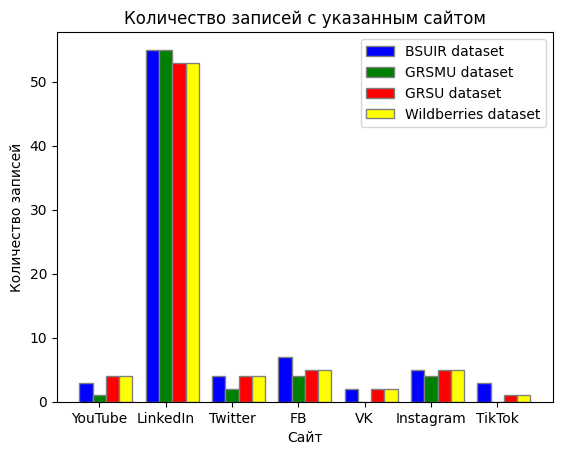

<Figure size 3000x3000 with 0 Axes>

,Dataset,YouTube,LinkedIn,Twitter,Facebook,Vkontakte,TikTok,Instagram
0,BSUIR,3,55,4,7,2,3,5
1,GRSMU,1,55,2,4,0,0,4
2,GRSU,4,53,4,5,2,1,5
3,Wildberries,4,53,4,5,2,1,5


In [7]:
count_yt1, count_li1, count_tw1, count_fb1, count_vk1, count_inst1, count_tt1 = search_socials(data_1a)
count_yt2, count_li2, count_tw2, count_fb2, count_vk2, count_inst2, count_tt2 = search_socials(data_2a)
count_yt3, count_li3, count_tw3, count_fb3, count_vk3, count_inst3, count_tt3 = search_socials(data_3a)
count_yt4, count_li4, count_tw4, count_fb4, count_vk4, count_inst4, count_tt4 = search_socials(data_3a)

sites = ['YouTube', 'LinkedIn', 'Twitter', 'FB', 'VK', 'Instagram', 'TikTok']

counts1 = [count_yt1, count_li1, count_tw1, count_fb1, count_vk1, count_inst1, count_tt1]
counts2 = [count_yt2, count_li2, count_tw2, count_fb2, count_vk2, count_inst2, count_tt2]
counts3 = [count_yt3, count_li3, count_tw3, count_fb3, count_vk3, count_inst3, count_tt3]
counts4 = [count_yt4, count_li4, count_tw4, count_fb4, count_vk4, count_inst4, count_tt4]

# Конфигурация отображения диаграммы
bar_width = 0.2
r1 = np.arange(len(counts1))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, counts1, color='b', width=bar_width, edgecolor='grey', label='BSUIR dataset')
plt.bar(r2, counts2, color='g', width=bar_width, edgecolor='grey', label='GRSMU dataset')
plt.bar(r3, counts3, color='r', width=bar_width, edgecolor='grey', label='GRSU dataset')
plt.bar(r4, counts4, color='yellow', width=bar_width, edgecolor='grey', label='Wildberries dataset')


plt.xlabel('Сайт')
plt.ylabel('Количество записей')
plt.title('Количество записей с указанным сайтом')
plt.xticks([r + bar_width for r in range(len(counts1))], sites)
plt.legend()
fig = plt.figure(figsize=(30, 30))

plt.show()

# Конфигурация отображения датафрейма
data = {'Dataset': ['BSUIR', 'GRSMU', 'GRSU', 'Wildberries'],
        'YouTube': [count_yt1, count_yt2, count_yt3, count_yt4],
        'LinkedIn': [count_li1, count_li2, count_li3, count_li4],
        'Twitter': [count_tw1, count_tw2, count_tw3, count_tw4],
        'Facebook': [count_fb1, count_fb2, count_fb3, count_fb4],
        'Vkontakte': [count_vk1, count_vk2, count_vk3, count_vk4],
        'TikTok': [count_tt1, count_tt2, count_tt3, count_tt4],
        'Instagram': [count_inst1, count_inst2, count_inst3, count_inst4]}

result_df = pd.DataFrame(data)
display(result_df)

Ячейка 8, вызов функции анализа количества различных публичных текстовых документов и формирование графического и табличного вывода

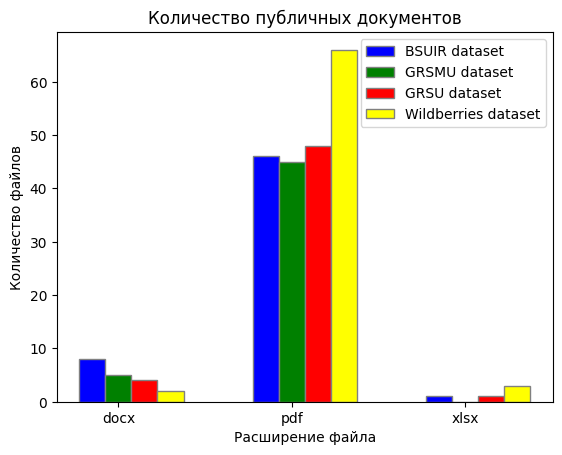

<Figure size 5000x5000 with 0 Axes>

,Dataset,docx,pdf,xlsx
0,BSUIR,8,46,1
1,GRSMU,5,45,0
2,GRSU,4,48,1
3,Wildberries,2,66,3


In [8]:
count_docx1, count_pdf1, count_xlsx1 = search_files(data_1a)
count_docx2, count_pdf2, count_xlsx2 = search_files(data_2a)
count_docx3, count_pdf3, count_xlsx3 = search_files(data_3a)
count_docx4, count_pdf4, count_xlsx4 = search_files(data_4a)

sites = ['docx', 'pdf', 'xlsx']

counts1 = [count_docx1, count_pdf1, count_xlsx1]
counts2 = [count_docx2, count_pdf2, count_xlsx2]
counts3 = [count_docx3, count_pdf3, count_xlsx3]
counts4 = [count_docx4, count_pdf4, count_xlsx4]

bar_width = 0.15
r1 = np.arange(len(counts1))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, counts1, color='b', width=bar_width, edgecolor='grey', label='BSUIR dataset')
plt.bar(r2, counts2, color='g', width=bar_width, edgecolor='grey', label='GRSMU dataset')
plt.bar(r3, counts3, color='r', width=bar_width, edgecolor='grey', label='GRSU dataset')
plt.bar(r4, counts4, color='yellow', width=bar_width, edgecolor='grey', label='Wildberries dataset')

plt.xlabel('Расширение файла')
plt.ylabel('Количество файлов')
plt.title('Количество публичных документов')
plt.xticks([r + bar_width for r in range(len(counts1))], sites)
plt.legend()
fig = plt.figure(figsize=(50, 50))

plt.show()

data = {'Dataset': ['BSUIR', 'GRSMU', 'GRSU', 'Wildberries'],
        'docx': [count_docx1, count_docx2, count_docx3, count_docx4],
        'pdf': [count_pdf1, count_pdf2, count_pdf3, count_pdf4],
        'xlsx': [count_xlsx1, count_xlsx2, count_xlsx3, count_xlsx4]}

result_df = pd.DataFrame(data)
display(result_df)

Ячейка 9, анализ показателей среднего сходства данных по разным конфигурациям датасетов

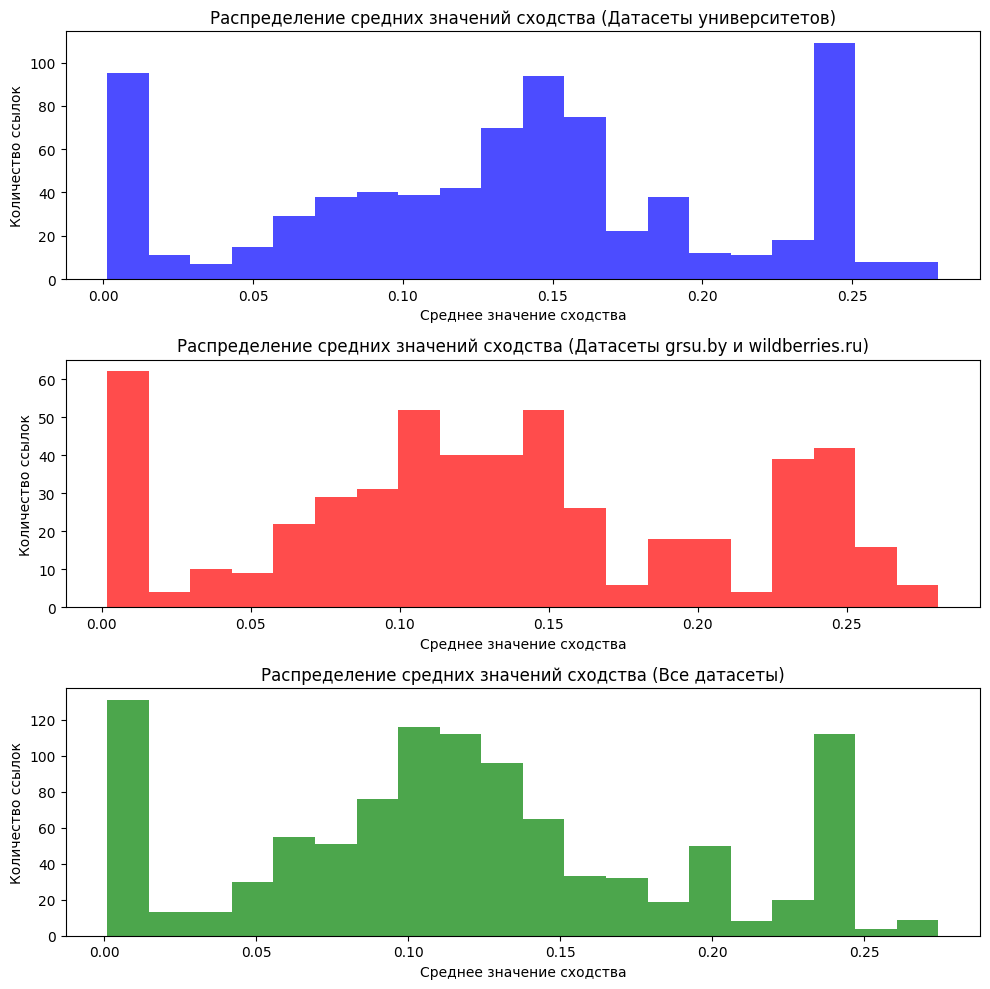

In [9]:
# Фильтрация строк от общих одинаковых элементов и их объединение
df_123 = pd.concat([data_1a, data_2a, data_3a])
df_123['Unnamed: 0'] = df_123['Unnamed: 0'].str.lower().str.replace('https://www.', '')

df_14 = pd.concat([data_1a, data_4a])
df_14['Unnamed: 0'] = df_14['Unnamed: 0'].str.lower().str.replace('https://www.', '')

df_1234 = pd.concat([data_1a, data_2a, data_3a, data_4a])
df_1234['Unnamed: 0'] = df_1234['Unnamed: 0'].str.lower().str.replace('https://www.', '')

# Векторизация строк значений датасетов
vectorizer = CountVectorizer()
X_123 = vectorizer.fit_transform(df_123['Unnamed: 0'])
X_14 = vectorizer.fit_transform(df_14['Unnamed: 0'])
X_1234 = vectorizer.fit_transform(df_1234['Unnamed: 0'])

# Нахождение матрицы схожести путем вычисления косинусной схожести векторизованных строк
similarity_matrix_123 = cosine_similarity(X_123)
similarity_matrix_14 = cosine_similarity(X_14)
similarity_matrix_1234 = cosine_similarity(X_1234)

# Нахождение средних значений схожести
avg_similarities_123 = similarity_matrix_123.mean(axis=1)
avg_similarities_14 = similarity_matrix_14.mean(axis=1)
avg_similarities_1234 = similarity_matrix_1234.mean(axis=1)

fig, axs = plt.subplots(3, 1, figsize=(10, 10))

axs[0].hist(avg_similarities_123, bins=20, color='b', alpha=0.7)
axs[0].set_title('Распределение средних значений сходства (Датасеты университетов)')
axs[0].set_xlabel('Среднее значение сходства')
axs[0].set_ylabel('Количество ссылок')

axs[1].hist(avg_similarities_14, bins=20, color='r', alpha=0.7)
axs[1].set_title('Распределение средних значений сходства (Датасеты grsu.by и wildberries.ru)')
axs[1].set_xlabel('Среднее значение сходства')
axs[1].set_ylabel('Количество ссылок')

axs[2].hist(avg_similarities_1234, bins=20, color='g', alpha=0.7)
axs[2].set_title('Распределение средних значений сходства (Все датасеты)')
axs[2].set_xlabel('Среднее значение сходства')
axs[2].set_ylabel('Количество ссылок')

plt.tight_layout()
plt.show()